# Extracción de datos de redes sociales
Alejandro Molina Villegas

**Objetivo:**

Conocer la forma en la que se extraen datos de redes sociales a través de un lenguaje de programación con el fin de ser analizados para un caso de interés.

**Lenguaje:** Python

**Caso de interés:** Aproximar reportes de atropellados (ilustrativo) para generar un mapa.

### Preparación

In [ ]:
!pip install snscrape
!pip install simplejson
!pip install geopandas
!pip install contextily

In [2]:
# obtener tuits
import snscrape.modules.twitter as twitter
# georreferenciación con geoparsing
import requests
import simplejson as json

# visualización en mapa
from shapely.geometry import Point
from geopandas import GeoDataFrame
import contextily as ctx
import matplotlib.pyplot as plt

### Obtención de tuits

In [4]:
query = "atropellado"
limit = 5

for i, tweet in enumerate(twitter.TwitterSearchScraper(query).get_items()):
    if i == limit:
        break
    print(tweet, tweet._asdict,'\n')

https://twitter.com/pulzo/status/1371639856464498690 <bound method Tweet._asdict of Tweet(url='https://twitter.com/pulzo/status/1371639856464498690', date=datetime.datetime(2021, 3, 16, 1, 50, tzinfo=datetime.timezone.utc), content='#Video Alcalde de Cali @JorgeIvanOspina quiso tranzar con plata a joven atropellado por su conductor 👉🏻 https://t.co/4zZMkGRTJD https://t.co/LdDCw68mrt', id=1371639856464498690, username='pulzo', outlinks=['https://bit.ly/3rXDjys'], outlinksss='https://bit.ly/3rXDjys', tcooutlinks=['https://t.co/4zZMkGRTJD'], tcooutlinksss='https://t.co/4zZMkGRTJD')> 

https://twitter.com/911Jalisco/status/1371639219282661383 <bound method Tweet._asdict of Tweet(url='https://twitter.com/911Jalisco/status/1371639219282661383', date=datetime.datetime(2021, 3, 16, 1, 47, 28, tzinfo=datetime.timezone.utc), content='ATROPELLADO 🚑 en Guadalajara, Col. Lomas De Polanco, Calle 7 y Calle 16. Tome precauciones', id=1371639219282661383, username='911Jalisco', outlinks=[], outlinksss='

### Georreferenciación

In [3]:

def geoparseMX(text):
    """Geoparsing service for mexican spanish
       see http://geoparsing.geoint.mx/mx/info/
    """
    geoparser_url = "http://geoparsing.geoint.mx/ws/"
    data = dict({"text" : text})
    try:
        response = requests.post(geoparser_url, json = data, headers={"Content-Type":"application/json"})
        jresponse = response.json()
        #print(json.dumps(jresponse, encoding="utf8", indent=2, ensure_ascii=False))
        for e in jresponse['entities']:
            place = e['nominatim'][0]
            if place['geojson']['type'] == 'Point':
                coords = place['geojson']['coordinates']
                return coords
    except Exception as e:
        coords = None
    return None


In [18]:
g = geoparseMX("Mi nombre es Alex y soy originario de la ciudad de México. Saludos")
print(g)

{
  "labeled": "Mi nombre es Alex y soy originario de la <START:location> ciudad de México <END> . Saludos\n",
  "entities": [
    {
      "index": 1,
      "entity": "ciudad de México",
      "context": "la <START:location> ciudad de México <END> . Saludos",
      "nominatim": [
        {
          "address": {
            "city": "Ciudad de México",
            "country": "México",
            "country_code": "mx",
            "county": "Cuauhtémoc",
            "postcode": "06060",
            "state": "CDMX"
          },
          "boundingbox": [
            "19.2726009",
            "19.5926009",
            "-99.2933416",
            "-98.9733416"
          ],
          "category": "place",
          "display_name": "Ciudad de México, Cuauhtémoc, CDMX, 06060, México",
          "geojson": {
            "coordinates": [
              -99.1333416,
              19.4326009
            ],
            "type": "Point"
          },
          "icon": "/nominatim/images/mapicons/poi_plac

In [ ]:
query = "atropellado"
points = []
for i, tweet in enumerate(twitter.TwitterSearchScraper(query).get_items()):
    try:
        coords = geoparseMX(tweet.content)
        if coords != None:
            points.append(coords)
    except:
        continue


### Mapa

In [7]:
def mapplot(list_points):
    """Points to Map"""
    geometry_points = [Point(x,y) for x, y in list_points]
    geodf = GeoDataFrame(geometry_points, crs="EPSG:4326", geometry=0)
    CRS_df = geodf.to_crs(epsg=3857)
    ax = CRS_df.plot()
    # we are using an extent around Mexico for the examples
    ax.axis((-13000000, -9700000, 1800000, 3900000))
    ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
    plt.show()


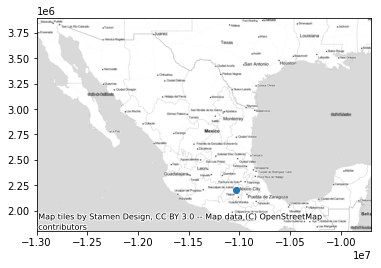

In [8]:
mapplot([[-99.1333416, 19.4326009]])

In [ ]:
mapplot(points)

# Referencias y Bibliografía

*    [Edwin Aldana-Bobadilla, Alejandro Molina-Villegas, Ivan López-Arévalo, Shanel Reyes-Palacios, Victor Muñiz-Sanchez, Jean Arreola-Trapala: Adaptive Geoparsing Method for Toponym Recognition and Resolution in Unstructured Text. Remote Sensing 12(18): 3041 (2020)](https://www.mdpi.com/2072-4292/12/18/3041/htm)

*    http://geoparsing.geoint.mx/mx/info/

*    https://pypi.org/project/snscrape/

*    https://www.geodatos.net/coordenadas/mexico

*    https://geopandas.org/docs/user_guide/projections.html